In [1]:
import pygsti
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from pygsti.algorithms import germselection
from pygsti.construction import std1Q_XYI

In [2]:
gs_target = std1Q_XYI.gs_target
gs_target.set_all_parameterizations('TP')

In [3]:
gs_true = gs_target.rotate(max_rotate=.1,seed=0)

In [4]:
bad_germ_list = pygsti.construction.list_all_gatestrings_onelen(std1Q_XYI.gates,1)+\
pygsti.construction.list_random_gatestrings_onelen(std1Q_XYI.gates,2,2,3)+\
pygsti.construction.list_random_gatestrings_onelen(std1Q_XYI.gates,3,2,3)+\
pygsti.construction.list_random_gatestrings_onelen(std1Q_XYI.gates,4,2,3)+\
pygsti.construction.list_random_gatestrings_onelen(std1Q_XYI.gates,5,1,3)

print bad_germ_list

[GateString(Gi), GateString(Gx), GateString(Gy), GateString(GxGy), GateString(GiGx), GateString(GxGyGi), GateString(GxGyGy), GateString(GxGyGiGx), GateString(GyGyGiGi), GateString(GxGyGiGxGy)]


In [5]:
bad_germ_list = pygsti.construction.list_all_gatestrings_onelen(std1Q_XYI.gates,1)

In [6]:
print len(bad_germ_list)
print len(std1Q_XYI.germs)

3
11


In [7]:
goodSVs = germselection.test_germ_list_infl(gs_true,std1Q_XYI.germs,returnSpectrum=True,check=True)[1]
badSVs = germselection.test_germ_list_infl(gs_true,bad_germ_list,returnSpectrum=True,check=True)[1]

In [8]:
def removeSPAMVectors(gateset):
    reducedGateset = gateset.copy()
    for prepLabel in reducedGateset.preps:
        del reducedGateset.preps[prepLabel]
    for effectLabel in reducedGateset.effects:
        del reducedGateset.effects[effectLabel]
    return reducedGateset

In [9]:
#Not counting SPAM parameters, how many gauge parameters are there in the gate set?
removeSPAMVectors(gs_true).num_gauge_params()

14

In [10]:
sortedGoodSVs = np.sort(np.abs(goodSVs))
sortedBadSVs = np.sort(np.abs(badSVs))

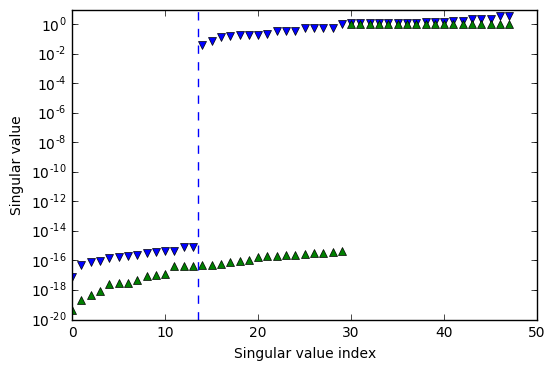

In [11]:
plt.semilogy(sortedGoodSVs,'v')
plt.semilogy(sortedBadSVs,'^')
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.axvline(13.5,linestyle='--')
plt.savefig('../Figures/Fig7.pdf')

In [12]:
len(np.sort(np.abs(goodSVs)))

48

In [13]:
for i in xrange(48):
    print sortedGoodSVs[i], sortedBadSVs[i]

7.9276108984e-18 4.55566786555e-20
4.66183348663e-17 2.15011278024e-19
7.85388404903e-17 4.54037626124e-19
9.85152059922e-17 8.48854442307e-19
1.56377035155e-16 2.44810831806e-18
1.77325094035e-16 2.97324639786e-18
2.10317847821e-16 3.18020697919e-18
2.2612934433e-16 4.8652352709e-18
3.4196973675e-16 9.45061301093e-18
4.01366710426e-16 1.05333750906e-17
4.36965210964e-16 1.26291934138e-17
4.61089113308e-16 4.14407699658e-17
8.05974547803e-16 4.16357927889e-17
8.15012305723e-16 4.3702958349e-17
0.0385827366741 4.759047913e-17
0.0719302027777 5.08204064145e-17
0.145673794343 5.74231246981e-17
0.161270259533 7.77839690986e-17
0.191925213841 9.27173398578e-17
0.191925213841 1.00073867807e-16
0.191925213841 1.60579774322e-16
0.215627147503 1.94570020759e-16
0.338312764841 2.11654628041e-16
0.338312764841 2.22191399061e-16
0.338312764841 2.24716887638e-16
0.533414006663 2.56464550514e-16
0.561767134379 3.15441446754e-16
0.561767134379 3.26593770202e-16
0.561767134379 3.59030985918e-16
1.0188